## **Hockey Game Analysis**

Data Info:
- There are two data files. One has a condensed event set from a randomly chosen hockey game and the other contains Expected Goals values (xg) provided only for shots that successfully hit the net. If an xg value doesn't correspond to a shot event, it should not be counted

- X and Y Coordinates are in Feet and are adjusted such that both teams shoot in the same direction

- Line Carry events are tagged when the puck is carried over either blue line or the centre ice red line

- Binary columns that have values of 0 or 1 indicate 0=No, 1=Yes

- Successfull passes are completed passes, successful shots are shots on net.

In [ ]:
#import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
#import game event datasets
df = pd.read_csv('/content/Tutorial22_df.csv')
df.head(10)

,gameid,teamid,opposingteamid,compiledgametime,playerid,eventname,outcome,type,possessionid,zone,xcoord,ycoord,teamskatersonicecount,opposingteamskatersonicecount,goal,team_net_empty,opponent_net_empty,scoredifferential
0,70632,596,724,2859.13330,485421,pass,successful,south,442,nz,-2.720505,-24.610668,5,5,0,0,0,3
1,70632,596,724,1023.53330,485421,pass,successful,north,160,oz,31.990311,9.805882,5,4,0,0,0,2
2,70632,724,596,3112.66670,628757,linecarry,successful,none,470,nz,-24.894119,-28.917648,5,5,0,0,0,-3
3,70632,724,596,212.20000,673651,pass,successful,outlet,30,dz,-73.223618,37.966553,5,5,0,0,0,0
4,70632,596,724,1893.66660,847481,reception,successful,regular,285,dz,-49.090302,-37.467644,5,5,0,0,0,3
5,70632,596,724,137.46666,812630,reception,successful,regular,19,dz,-62.067566,-38.190079,5,5,0,0,0,0
6,70632,596,724,1425.86670,92751,pass,failed,d2d,223,dz,-97.402405,1.240749,5,5,0,0,0,2
7,70632,596,724,1763.13330,403721,pass,successful,d2d,267,dz,-94.850098,-24.900017,4,5,0,0,0,2
8,70632,596,724,1024.33340,828703,reception,successful,regular,160,oz,45.066772,36.461761,5,4,0,0,0,2
9,70632,596,724,1894.00000,847481,pass,successful,outlet,285,dz,-44.060898,-37.970589,5,5,0,0,0,3


In [ ]:
#import XG dataset
xG = pd.read_csv('/content/Tutorial22_xG_df.csv')
xG.head(5)

,teamid,compiledgametime,playerid,xg
0,724,33.30,628757,0.134104
1,724,35.10,838211,0.188982
2,724,60.30,628757,0.092400
3,724,68.20,288890,0.039566
4,724,74.82,288890,0.066700


In [ ]:
'''
## According to this dataset instruction "If an xg value doesn't correspond to a shot event, it should not be counted"
So we will use marged datasets below for shot events which has the xG values. and will use it for shot counts

'''
merged_df = pd.merge(df, xG, on=["teamid", "compiledgametime", "playerid"])

# display the merged data set
merged_df.head()

,gameid,teamid,opposingteamid,compiledgametime,playerid,eventname,outcome,type,possessionid,zone,xcoord,ycoord,teamskatersonicecount,opposingteamskatersonicecount,goal,team_net_empty,opponent_net_empty,scoredifferential,xg
0,70632,724,596,406.13333,698619,shot,successful,outside,66,oz,43.188061,16.619492,5,5,0,0,0,0,0.033468
1,70632,596,724,2077.86670,812630,shot,successful,slot,312,oz,71.615578,11.820587,5,5,0,0,0,3,0.119066
2,70632,596,724,1026.56670,828703,shot,successful,outside,160,oz,50.096191,19.864708,5,4,0,0,0,2,0.114808
3,70632,596,724,2468.10000,797810,shot,successful,slot,375,oz,84.241180,4.776470,5,5,0,0,0,3,0.041450
4,70632,724,596,1403.63330,183489,shot,successful,slot,218,oz,69.710892,-0.252941,5,5,0,0,0,-2,0.138980


In [ ]:
## A1.a)
# Find out the goal count of the game
goals = df[df['goal'] == 1]

# Group the data by team ID and count the number of goals for each team
goal_counts = goals.groupby('teamid').count()['goal']

# Determine the winner of the game (team with the most goals)
winner = goal_counts.idxmax()

print(f"The winner of the game is Team {winner} with {goal_counts[winner]} goals!")
print("Goal counts by team:")
print(goal_counts)

The winner of the game is Team 596 with 4 goals!
Goal counts by team:
teamid
596    4
724    1
Name: goal, dtype: int64


In [ ]:
##A1.b)
#Expected goal(xG) and total xg of each team

#team 724
team_724 = xG[xG['teamid'] == 724]
team_724.head()
xg_sum_724 = team_724['xg'].sum()
print(f"Total xg of team:724 = {xg_sum_724}")

#team_596
team_596 = xG[xG['teamid'] == 596]
team_596.head()
xg_sum_596 = team_596['xg'].sum()
print(f"Total xg of team:596 = {xg_sum_596}")



Total xg of team:724 = 3.221937193
Total xg of team:596 = 4.7426154039999995


**Findings**
#Who won the game & what was the score?
--> "Team596" won the game. While "Team596" scored 4 goals and "Team724" scored 1 goal.
#Who won the Expected Goals (xg) battle & what was each team's total xg?
-->  "Team596" won the exprected goals(xg) battle. Total xg of "Team724" = 3.22 and "Team596" = 4.74
#What do these two answers tell us about how the two teams played?
--> Expected goal(xG) is always calculated from 100% if any xg is more than 50% then it is considered as positive xg usually. Here from the sum of expected goals of both teams, it is explicit that "Team596" created more chances of goal and played well then "Team724", due to the fact "Team5.

In [ ]:
##A2.a)
# Find out the possessionid that had the highest total successful passes.

passes = df[(df['eventname'] == 'pass') & (df['outcome'] == 'successful')]

pass_counts = passes['possessionid'].value_counts()

# find the possession ID with the highest count of successful passes
highest_pass_count = pass_counts.idxmax()

print("The possessionid with the highest number of successful passes is", highest_pass_count)

The possessionid with the highest number of successful passes is 417


In [ ]:
##A2.b)
# Find out the number of successful passes.

successful_passes = df[(df['eventname'] == 'pass') & (df['outcome'] == 'successful')]

# count the number of successful passes
num_success_passes = len(successful_passes)

print("The number of successful passes:", num_success_passes)

The number of successful passes: 552


In [ ]:
##A2.b)
# Analysis for possessionid 417 succussful passes

successfulpassanalysis_417 = df[(df['eventname'] == 'pass') & (df['outcome'] == 'successful') & (df['possessionid'] == 417) ]

successfulpassanalysis_417.head()

,gameid,teamid,opposingteamid,compiledgametime,playerid,eventname,outcome,type,possessionid,zone,xcoord,ycoord,teamskatersonicecount,opposingteamskatersonicecount,goal,team_net_empty,opponent_net_empty,scoredifferential
872,70632,724,596,2683.6000,890686,pass,successful,outlet,417,dz,-63.117645,31.938236,5,4,0,0,0,-3
925,70632,724,596,2688.7334,154967,pass,successful,south,417,oz,37.470589,-38.473526,5,4,0,0,0,-3
951,70632,724,596,2692.5000,154967,pass,successful,north,417,oz,79.214706,-37.970589,5,4,0,0,0,-3
965,70632,724,596,2694.6333,890686,pass,successful,south,417,oz,98.326469,-7.794117,5,4,0,0,0,-3
981,70632,724,596,2696.0000,154967,pass,successful,south,417,oz,82.232353,-36.964706,5,4,0,0,0,-3


**Findings**
#Which possessionid had the highest total successful passes? 
--> The possession ID : 417 had the highest number of successful passes.
#How many successful passes were there and why do this specific possession had so many?
--> There were 552 successful passes by both of the teams. From the data analysis below we can see, created passes in the possessionid 417 most of are done in "OZ" zone(only 1 pass in "DZ" zone) and all the passes are done by the 724 team. Due to the fact I think, the opponent 596 team might have a weakness in "OZ" zone. This can be a reason of such number of successfull pass in this positionid.

In [ ]:
##A3
## the likely xCoord of each blueline

min_xcoord = df['xcoord'].min()
max_xcoord = df['xcoord'].max()

# Calculate the likely xCoord of the 1st blueline
likely_xcoord_1 = (max_xcoord - min_xcoord) / 2 + max_xcoord

# Calculate the likely xCoord of the 2nd blueline
likely_xcoord_2 = -((max_xcoord - min_xcoord) / 2) + min_xcoord

print('Likely xCoord of 1st blueline:', likely_xcoord_1)
print('Likely xCoord of 2nd blueline:', likely_xcoord_2)

Likely xCoord of 1st blueline: 197.19860458374023
Likely xCoord of 2nd blueline: -198.1131477355957


**Findigs**
#Using the event data provided along with x/y coordinate columns,  identify the likely xCoord of each blueline.
--> Likely xCoord of 1st blueline: 197.199
--> Likely xCoord of 2nd blueline: -198.113

In [ ]:
'''
## According to this dataset instruction "If an xg value doesn't correspond to a shot event, it should not be counted"
So we will use marged datasets below for shot events which has the xG values. and will use it for shot counts

'''
merged_df = pd.merge(df, xG, on=["teamid", "compiledgametime", "playerid"])

# display the merged data set
merged_df.head()

,gameid,teamid,opposingteamid,compiledgametime,playerid,eventname,outcome,type,possessionid,zone,xcoord,ycoord,teamskatersonicecount,opposingteamskatersonicecount,goal,team_net_empty,opponent_net_empty,scoredifferential,xg
0,70632,724,596,406.13333,698619,shot,successful,outside,66,oz,43.188061,16.619492,5,5,0,0,0,0,0.033468
1,70632,596,724,2077.86670,812630,shot,successful,slot,312,oz,71.615578,11.820587,5,5,0,0,0,3,0.119066
2,70632,596,724,1026.56670,828703,shot,successful,outside,160,oz,50.096191,19.864708,5,4,0,0,0,2,0.114808
3,70632,596,724,2468.10000,797810,shot,successful,slot,375,oz,84.241180,4.776470,5,5,0,0,0,3,0.041450
4,70632,724,596,1403.63330,183489,shot,successful,slot,218,oz,69.710892,-0.252941,5,5,0,0,0,-2,0.138980


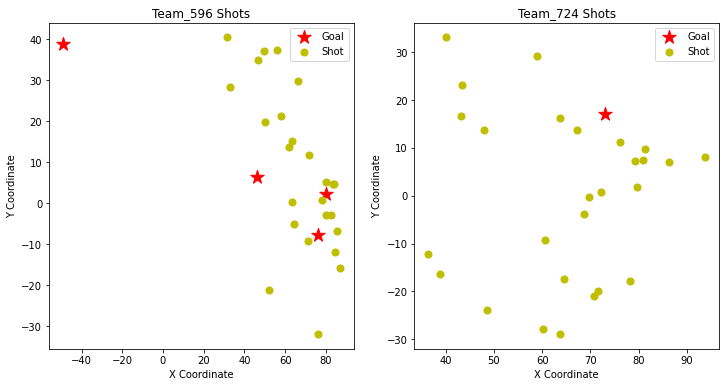

In [ ]:
## A4.a)

# separate DataFrames for each team
team_596 = merged_df[merged_df['teamid'] == 596]
team_724 = merged_df[merged_df['teamid'] == 724]

# scatter plots with goals highlighted
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# for team_596
team_596_goals = team_596[team_596['goal'] == 1]
team_596_shots = team_596[team_596['goal'] == 0]

''' 
"Yellow dots" are shots taken and "red star" those are goal

'''
ax[0].scatter(team_596_goals['xcoord'], team_596_goals['ycoord'], marker='*', s=200, c='r', label='Goal')
ax[0].scatter(team_596_shots['xcoord'], team_596_shots['ycoord'], marker='o', s=50, c='y', label='Shot')
ax[0].set_title('Team_596 Shots')
ax[0].set_xlabel('X Coordinate')
ax[0].set_ylabel('Y Coordinate')
ax[0].legend()

# for team_724
team_724_goals = team_724[team_724['goal'] == 1]
team_724_shots = team_724[team_724['goal'] == 0]

ax[1].scatter(team_724_goals['xcoord'], team_724_goals['ycoord'], marker='*', s=200, c='r', label='Goal')
ax[1].scatter(team_724_shots['xcoord'], team_724_shots['ycoord'], marker='o', s=50, c='y', label='Shot')
ax[1].set_title('Team_724 Shots')
ax[1].set_xlabel('X Coordinate')
ax[1].set_ylabel('Y Coordinate')
ax[1].legend()

plt.show()

#Describe the findings for each team.
--> The scatter plot is provided below for shots by each teams and those are converted into goal. Here, "Yellow dots" are shots taken and "red star" those are goal.
*Apprently, the shot taken by Team_596 from the mid-field converted into goals (3 goals from 4 goals). So, it seems like Team_724 is weaker in the mid-field area which can be a reason to defeat the game for them and future improvements of the players.*

In [ ]:
##A5.a)

df_goals = merged_df[merged_df['goal'] == 1]

# find the maximum xg value in the filtered dataframe
max_xg = df_goals['xg'].max()

print("The highest xg among the goals is:", max_xg)

The highest xg among the goals is: 0.999534607


In [ ]:
##A5.b)
'''
 "Did this goal have a shot assist?" To find out this question we can find out the player id who had the highest xG.
 and, to observe the privious "compliledgametime" for this shot events
 '''
highest_xg_player = merged_df['xg'].idxmax()
player_id = merged_df.loc[highest_xg_player, 'playerid']
print(f'player id with highest xg: {player_id}')

player id with highest xg: 290779


**Findings**
#What is highest xg among the goals that were scored and why it was such high?
-->The highest xg among the goals is: 0.999534607.
*Here The xG can be high due to several reason. but i think, the player went very closer to the goal post and beat the goalkeeper and got the goalpost empty. This is the reason the xG is 99.9% almost 100%.*

#Did this goal have a shot assist?
--> Its hard to tell from this xG value about that is there anyone assisted or not. I guess there was no shot assistance in this goal. Player id with highest xG is 290779 and from the data observation I can see that he is the player of team_596.

Thanks for your time!!